# Predictive modeling
This file is aiming at finding the optimum algorithm for house price prediction.  
Different algorithms will be utilized and tested.

## Data Analysis
First of all, import the data and analyze its characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/Processed_data.csv")

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313000,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384000,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342000,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420000,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550000,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3.0,1.75,1510,6360,1.0,0,0,4,...,1979,501 N 143rd St,Seattle,WA 98133,USA,501 N 143rd St Seattle WA 98133 USA,47.732048,-122.352864,2014,7
4596,2014-07-09,534333,3.0,2.50,1460,7573,2.0,0,0,3,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,14855 SE 10th Pl Bellevue WA 98007 USA,47.601195,-122.141083,2014,7
4597,2014-07-09,416904,3.0,2.50,3010,7014,2.0,0,0,3,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,759 Ilwaco Pl NE Renton WA 98059 USA,47.494972,-122.149350,2014,7
4598,2014-07-10,203400,4.0,2.00,2090,6630,1.0,0,0,3,...,0,5148 S Creston St,Seattle,WA 98178,USA,5148 S Creston St Seattle WA 98178 USA,47.507109,-122.267937,2014,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   int64  
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  Address 

In [5]:
data_backup = data.copy()
data_backup.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313000,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384000,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342000,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420000,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550000,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5


In [6]:
# Unit conversion
data['price'] = data['price']/1000
data['price'].astype(int)
data.rename(columns={'price':'price(1000$)'}, inplace=True)

columns_to_convert = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in columns_to_convert:
    data[col] = data[col] * 0.093
data.rename(columns={'sqft_living':'sqm_living', 'sqft_lot':'sqm_lot', 'sqft_above':'sqm_above', 'sqft_basement':'sqm_basement'}, inplace=True)

data['yr_built'] = 2014 - data['yr_built']

rows = data.shape[0]
for i in range(rows):
    if data.loc[i, 'yr_renovated'] == 0: 
        data.loc[i, 'yr_renovated'] = data.loc[i, 'yr_built']
    else:
        data.loc[i, 'yr_renovated'] = 2014 - data.loc[i, 'yr_renovated']
data.head()

,date,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,Address,Latitude,Longitude,Year,Month
0,2014-05-02,313.0,3.0,1.50,124.62,735.816,1.5,0,0,3,...,9,18810 Densmore Ave N,Shoreline,WA 98133,USA,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,2014,5
1,2014-05-02,2384.0,5.0,2.50,339.45,841.650,2.0,0,4,5,...,93,709 W Blaine St,Seattle,WA 98119,USA,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,2014,5
2,2014-05-02,342.0,3.0,2.00,179.49,1111.071,1.0,0,0,4,...,48,26206-26214 143rd Ave SE,Kent,WA 98042,USA,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,2014,5
3,2014-05-02,420.0,3.0,2.25,186.00,746.790,1.0,0,0,4,...,51,857 170th Pl NE,Bellevue,WA 98008,USA,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,2014,5
4,2014-05-02,550.0,4.0,2.50,180.42,976.500,1.0,0,0,4,...,22,9105 170th Ave NE,Redmond,WA 98052,USA,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,2014,5


In [7]:
# Delete unneeded columns
data.drop(['date', 'street', 'city', 'statezip', 'country', 'Year'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price(1000$)  4600 non-null   float64
 1   bedrooms      4600 non-null   float64
 2   bathrooms     4600 non-null   float64
 3   sqm_living    4600 non-null   float64
 4   sqm_lot       4600 non-null   float64
 5   floors        4600 non-null   float64
 6   waterfront    4600 non-null   int64  
 7   view          4600 non-null   int64  
 8   condition     4600 non-null   int64  
 9   sqm_above     4600 non-null   float64
 10  sqm_basement  4600 non-null   float64
 11  yr_built      4600 non-null   int64  
 12  yr_renovated  4600 non-null   int64  
 13  Address       4600 non-null   object 
 14  Latitude      4600 non-null   float64
 15  Longitude     4600 non-null   float64
 16  Month         4600 non-null   int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 611.1+ KB


In [8]:
# Add new features
data['living_ratio'] = data['sqm_living'] / data['sqm_lot']	

In [9]:
data

,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Address,Latitude,Longitude,Month,living_ratio
0,313.000,3.0,1.50,124.62,735.816,1.5,0,0,3,124.62,0.00,59,9,18810 Densmore Ave N Shoreline WA 98133 USA,47.765784,-122.338860,5,0.169363
1,2384.000,5.0,2.50,339.45,841.650,2.0,0,4,5,313.41,26.04,93,93,709 W Blaine St Seattle WA 98119 USA,47.634528,-122.366896,5,0.403315
2,342.000,3.0,2.00,179.49,1111.071,1.0,0,0,4,179.49,0.00,48,48,26206-26214 143rd Ave SE Kent WA 98042 USA,47.367389,-122.150525,5,0.161547
3,420.000,3.0,2.25,186.00,746.790,1.0,0,0,4,93.00,93.00,51,51,857 170th Pl NE Bellevue WA 98008 USA,47.618727,-122.113859,5,0.249066
4,550.000,4.0,2.50,180.42,976.500,1.0,0,0,4,106.02,74.40,38,22,9105 170th Ave NE Redmond WA 98052 USA,47.683072,-122.113971,5,0.184762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308.166,3.0,1.75,140.43,591.480,1.0,0,0,4,140.43,0.00,60,35,501 N 143rd St Seattle WA 98133 USA,47.732048,-122.352864,7,0.237421
4596,534.333,3.0,2.50,135.78,704.289,2.0,0,0,3,135.78,0.00,31,5,14855 SE 10th Pl Bellevue WA 98007 USA,47.601195,-122.141083,7,0.192790
4597,416.904,3.0,2.50,279.93,652.302,2.0,0,0,3,279.93,0.00,5,5,759 Ilwaco Pl NE Renton WA 98059 USA,47.494972,-122.149350,7,0.429142
4598,203.400,4.0,2.00,194.37,616.590,1.0,0,0,3,99.51,94.86,40,40,5148 S Creston St Seattle WA 98178 USA,47.507109,-122.267937,7,0.315234


In [10]:
# Clean Data
data.describe()

,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,551.962975,3.400870,2.160815,198.959267,1381.283996,1.512065,0.007174,0.240652,3.451739,169.935685,29.023582,43.213696,28.957391,47.567144,-122.214466,5.757609,0.327337
std,563.834706,0.908848,0.783781,89.578243,3337.252561,0.538288,0.084404,0.778405,0.677230,80.181715,43.164762,29.731848,26.863922,0.133520,0.142312,0.683851,0.264850
min,0.000000,0.000000,0.000000,34.410000,59.334000,1.000000,0.000000,0.000000,1.000000,34.410000,0.000000,0.000000,0.000000,47.155972,-122.506570,5.000000,0.002123
25%,322.875000,3.000000,1.750000,135.780000,465.069750,1.000000,0.000000,0.000000,3.000000,110.670000,0.000000,17.000000,9.000000,47.486293,-122.330779,5.000000,0.158366
50%,460.943000,3.000000,2.250000,184.140000,714.519000,1.500000,0.000000,0.000000,3.000000,147.870000,0.000000,38.000000,20.000000,47.582249,-122.231924,6.000000,0.252927
75%,654.962500,4.000000,2.500000,243.660000,1023.116250,2.000000,0.000000,0.000000,4.000000,213.900000,56.730000,63.000000,41.000000,47.678096,-122.125066,6.000000,0.416549
max,26590.000000,9.000000,8.000000,1259.220000,99902.274000,3.500000,1.000000,4.000000,5.000000,875.130000,448.260000,114.000000,114.000000,47.777171,-121.315124,7.000000,2.291399


[Text(0.5, 1.0, 'Box Plot of Scores')]

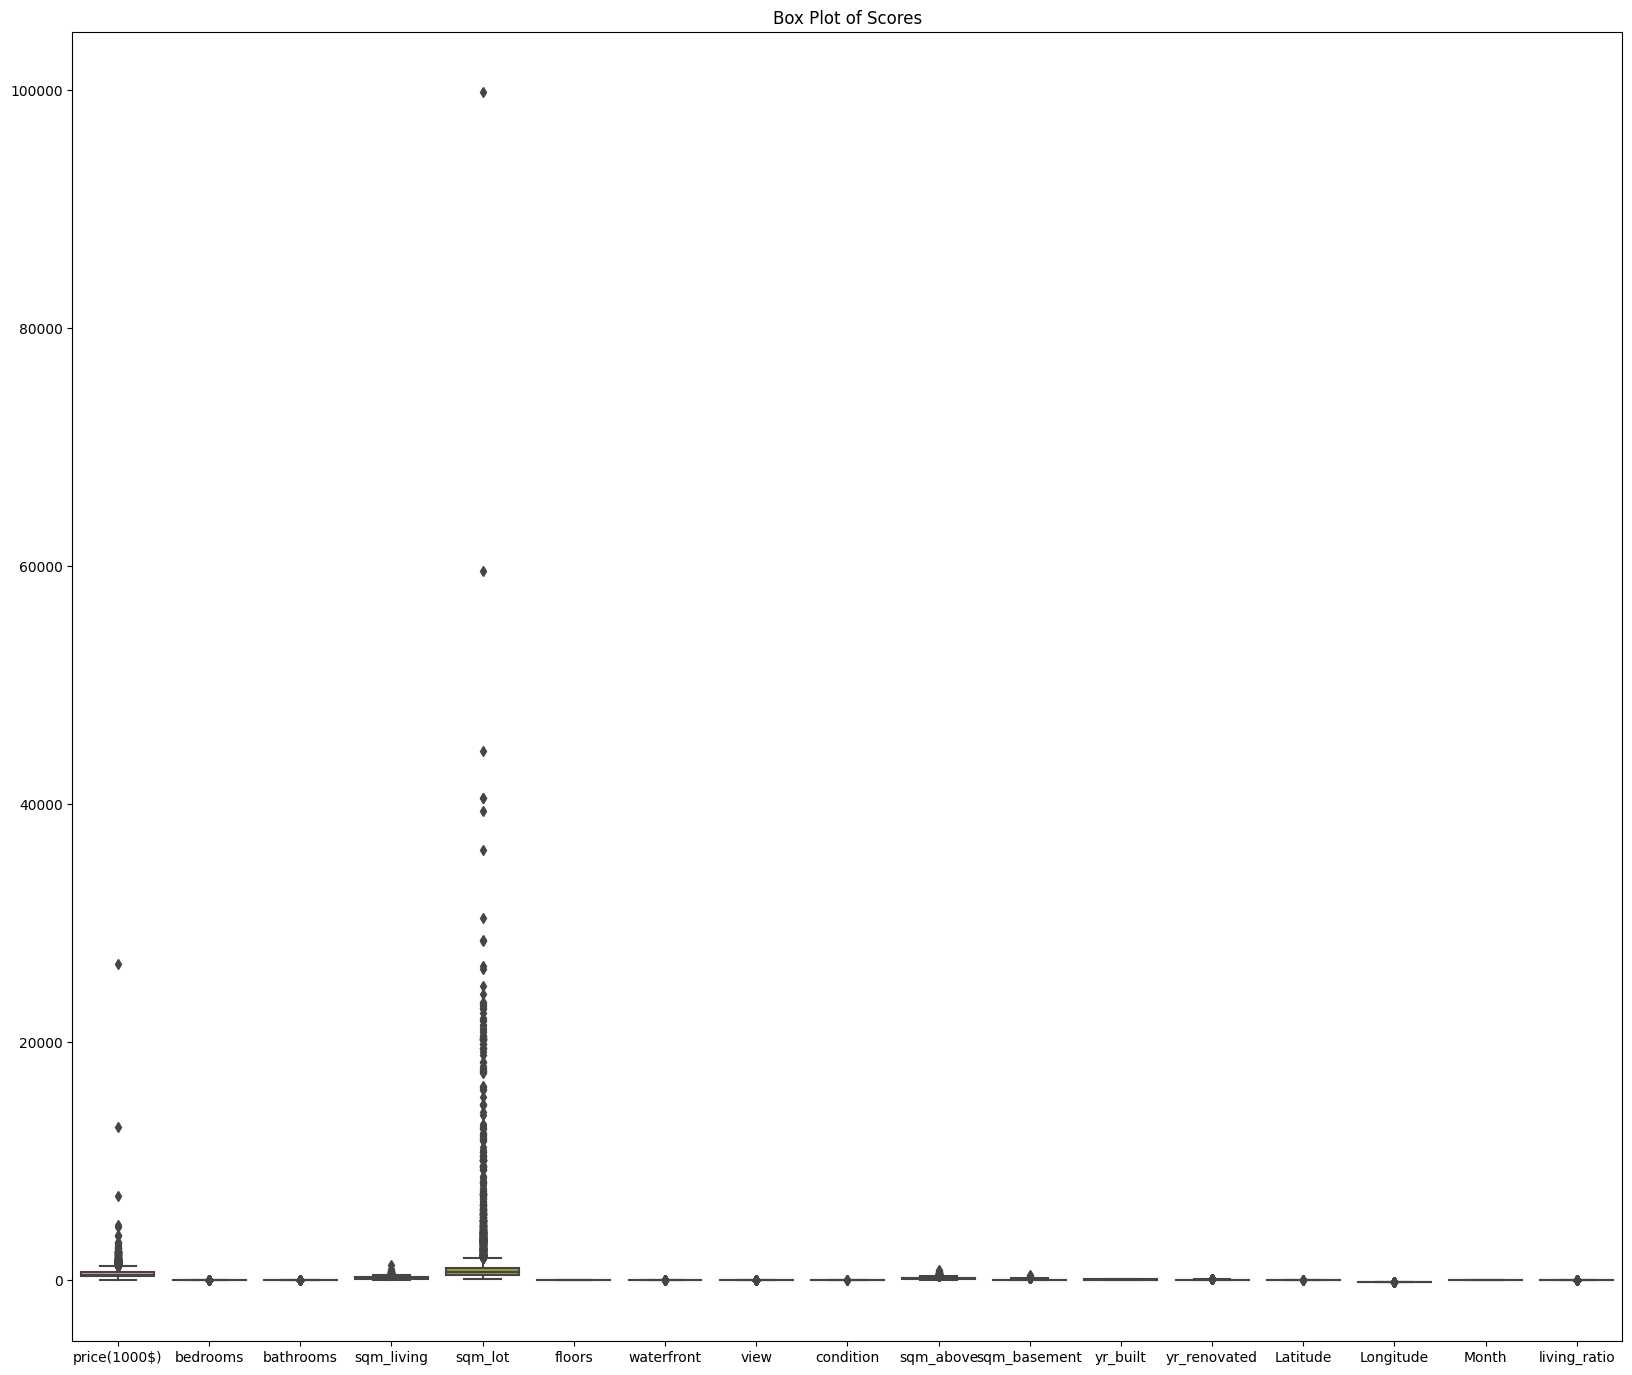

In [11]:
plt.figure(figsize=(20,17))
sns.boxplot(data=data).set(title="Box Plot of Scores")

In [12]:
lower_limit_price, upper_limit_price = np.percentile(a=data['price(1000$)'],q=[5,99.5])
print(upper_limit_price)
print(lower_limit_price)

2400.0
200.0


In [13]:
data = data[(data['price(1000$)']>lower_limit_price) & (data['price(1000$)']<upper_limit_price)]
data.describe()

,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000
mean,552.793612,3.417109,2.184863,200.365552,1383.645208,1.526862,0.005534,0.233572,3.451925,171.102288,29.263264,42.466913,28.631312,47.572885,-122.213153,5.761817,0.334374
std,308.496214,0.891282,0.749131,84.501999,3385.121301,0.540265,0.074192,0.760594,0.672370,77.599472,42.355152,29.792291,26.761001,0.131537,0.142642,0.684393,0.268042
min,200.500000,0.000000,0.000000,34.410000,59.334000,1.000000,0.000000,0.000000,1.000000,34.410000,0.000000,0.000000,0.000000,47.155972,-122.506570,5.000000,0.002123
25%,342.000000,3.000000,1.750000,139.500000,465.000000,1.000000,0.000000,0.000000,3.000000,112.530000,0.000000,16.000000,9.000000,47.492697,-122.331020,5.000000,0.163235
50%,476.000000,3.000000,2.250000,186.000000,709.683000,1.500000,0.000000,0.000000,3.000000,150.660000,0.000000,37.000000,20.000000,47.587422,-122.228766,6.000000,0.259974
75%,661.254000,4.000000,2.500000,244.590000,1015.560000,2.000000,0.000000,0.000000,4.000000,215.760000,57.660000,62.000000,40.000000,47.680479,-122.121937,6.000000,0.423443
max,2384.000000,9.000000,8.000000,1259.220000,99902.274000,3.500000,1.000000,4.000000,5.000000,875.130000,384.090000,114.000000,114.000000,47.777171,-121.405715,7.000000,2.291399


In [14]:
lower_limit_lot, upper_limit_lot = np.percentile(a=data['sqm_lot'],q=[5,99.5])
print(upper_limit_lot)
print(lower_limit_lot)

21815.89535999998
149.9904


In [15]:
data = data[(data['sqm_lot']>lower_limit_lot) & (data['sqm_lot']<upper_limit_lot)]
data.describe()

,price(1000$),bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio
count,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,558.374984,3.458272,2.177648,203.777955,1281.166389,1.479502,0.005857,0.240117,3.474622,173.750983,30.026972,44.266471,29.487799,47.570192,-122.208619,5.767448,0.294430
std,313.412918,0.883688,0.749530,82.679062,2243.351590,0.500982,0.076313,0.769463,0.681328,77.290539,42.664193,29.399785,26.782110,0.133169,0.142263,0.684459,0.192566
min,200.500000,0.000000,0.000000,34.410000,150.009000,1.000000,0.000000,0.000000,1.000000,34.410000,0.000000,0.000000,0.000000,47.155972,-122.506570,5.000000,0.006642
25%,340.000000,3.000000,1.750000,145.080000,498.828750,1.000000,0.000000,0.000000,3.000000,114.390000,0.000000,20.000000,11.000000,47.487713,-122.324991,5.000000,0.160000
50%,481.725000,3.000000,2.250000,190.650000,725.400000,1.500000,0.000000,0.000000,3.000000,154.380000,0.000000,40.000000,20.000000,47.583598,-122.219190,6.000000,0.250200
75%,674.319000,4.000000,2.500000,248.310000,1039.065750,2.000000,0.000000,0.000000,4.000000,219.480000,61.380000,64.000000,41.000000,47.680925,-122.119129,6.000000,0.390544
max,2384.000000,9.000000,6.500000,680.760000,21794.736000,3.500000,1.000000,4.000000,5.000000,680.760000,265.050000,114.000000,114.000000,47.777171,-121.405715,7.000000,1.634093


In [16]:
#Save clean data
data.to_csv('../data/clean_data.csv',index=False,header=True)

In [17]:
data.drop(['Address'], axis=1, inplace=True)

In [73]:
# Split the data to train data and test data.
# The analysis will only be done in train data
from sklearn.model_selection import train_test_split

X = data.drop(['price(1000$)'], axis=1)
y = data['price(1000$)']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
train_data = X_train.join(y_train)
train_data.reset_index(drop=True, inplace=True)
train_data

,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,sqm_above,sqm_basement,yr_built,yr_renovated,Latitude,Longitude,Month,living_ratio,price(1000$)
0,5.0,3.25,388.74,4577.646,2.0,0,0,4,267.84,120.90,35,35,47.548797,-122.092667,5,0.084921,869.000
1,5.0,4.50,482.67,2205.588,2.0,0,2,3,315.27,167.40,27,14,47.584654,-122.223004,5,0.218840,1702.500
2,3.0,2.00,168.33,377.952,1.5,0,0,3,168.33,0.00,89,12,47.685918,-122.338811,6,0.445374,550.000
3,3.0,3.50,115.32,154.938,2.0,0,0,3,93.00,22.32,6,6,47.549628,-122.388080,6,0.744298,435.500
4,4.0,2.50,189.72,781.200,1.0,0,0,3,132.06,57.66,51,6,47.551153,-122.169906,6,0.242857,500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,5.0,2.00,260.40,1654.284,1.0,0,0,4,130.20,130.20,51,51,47.671870,-122.163515,7,0.157409,665.000
3274,4.0,2.00,188.79,892.800,1.5,0,0,3,132.99,55.80,67,2,47.445907,-122.272259,6,0.211458,253.779
3275,3.0,2.50,311.55,372.651,2.0,0,0,3,237.15,74.40,9,9,47.727687,-122.206998,6,0.836037,635.000
3276,3.0,1.00,92.07,627.750,1.0,0,0,4,92.07,0.00,67,26,47.712431,-122.331112,5,0.146667,325.000


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqm_living'}>,
        <Axes: title={'center': 'sqm_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqm_above'}>,
        <Axes: title={'center': 'sqm_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'living_ratio'}>],
       [<Axes: title={'center': 'price(1000$)'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

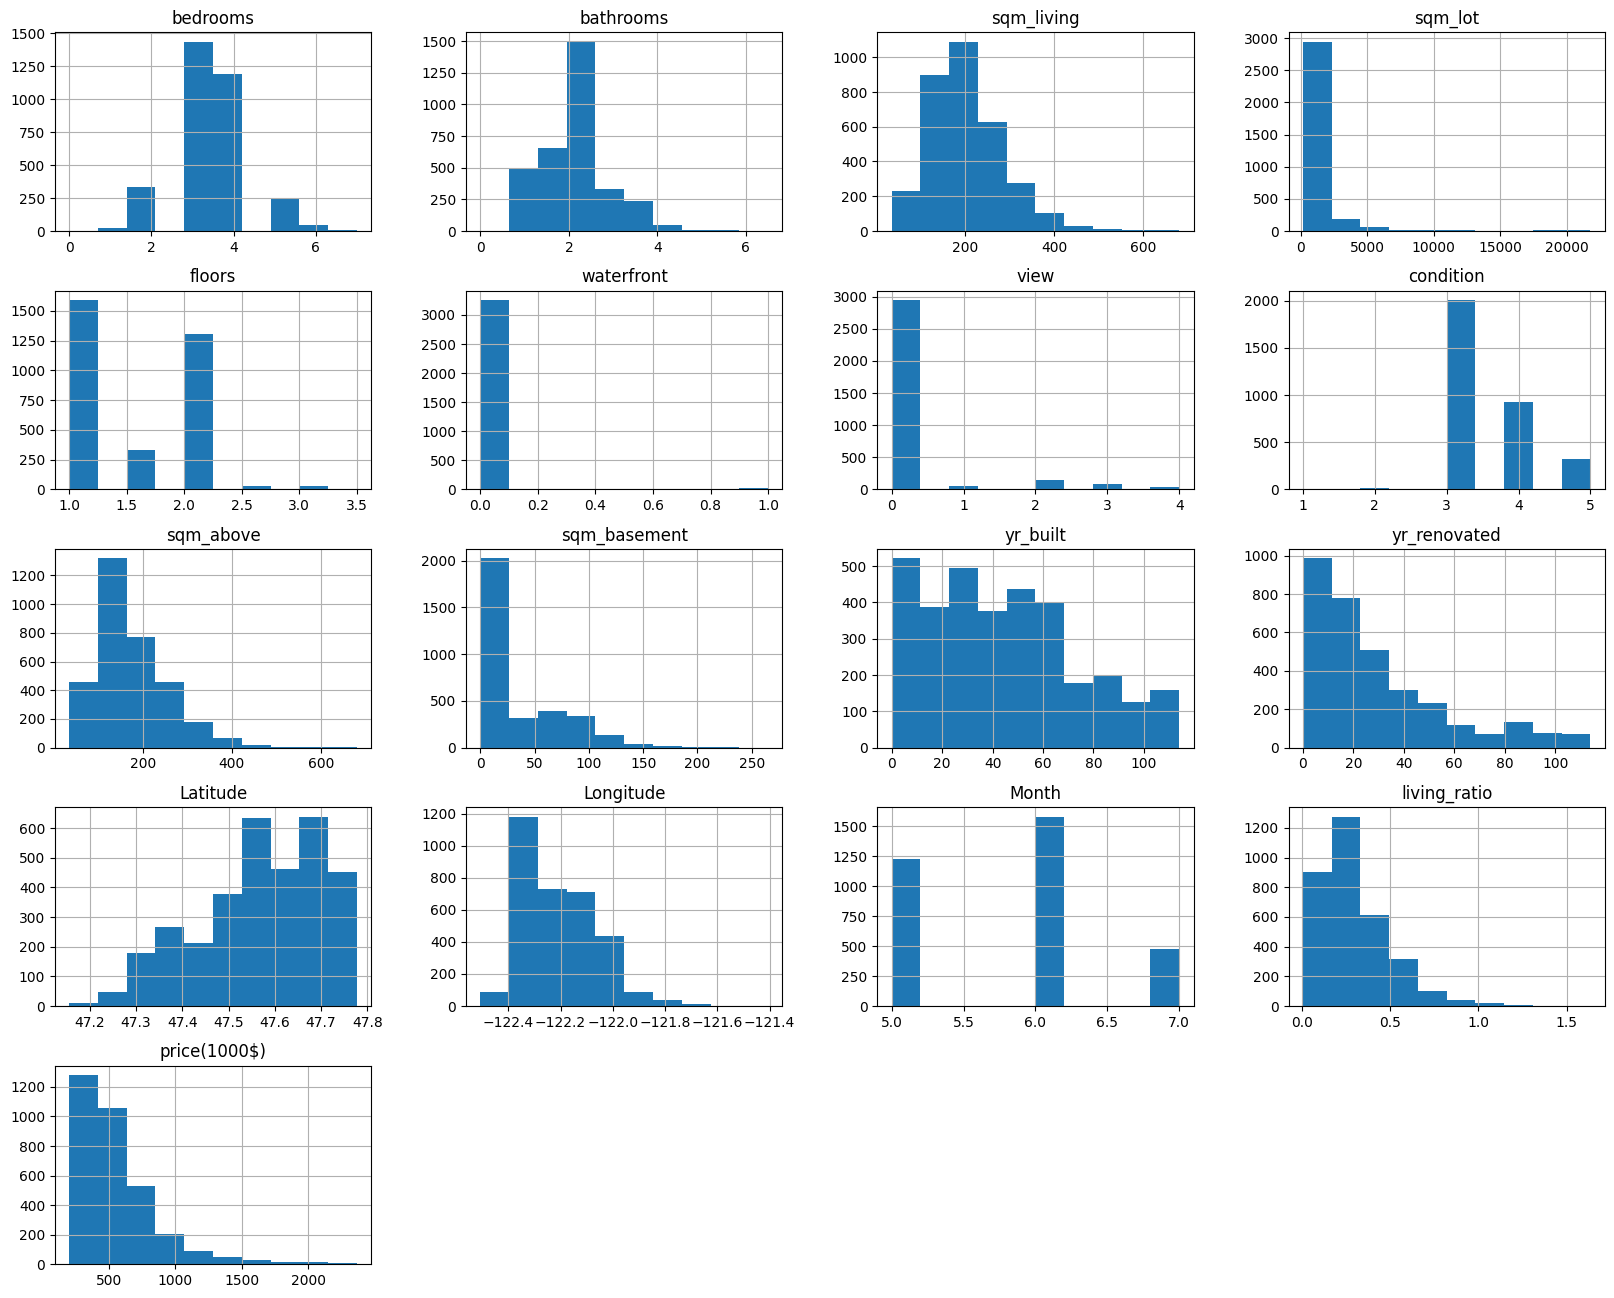

In [76]:
train_data.hist(figsize=(20, 16))

<Axes: >

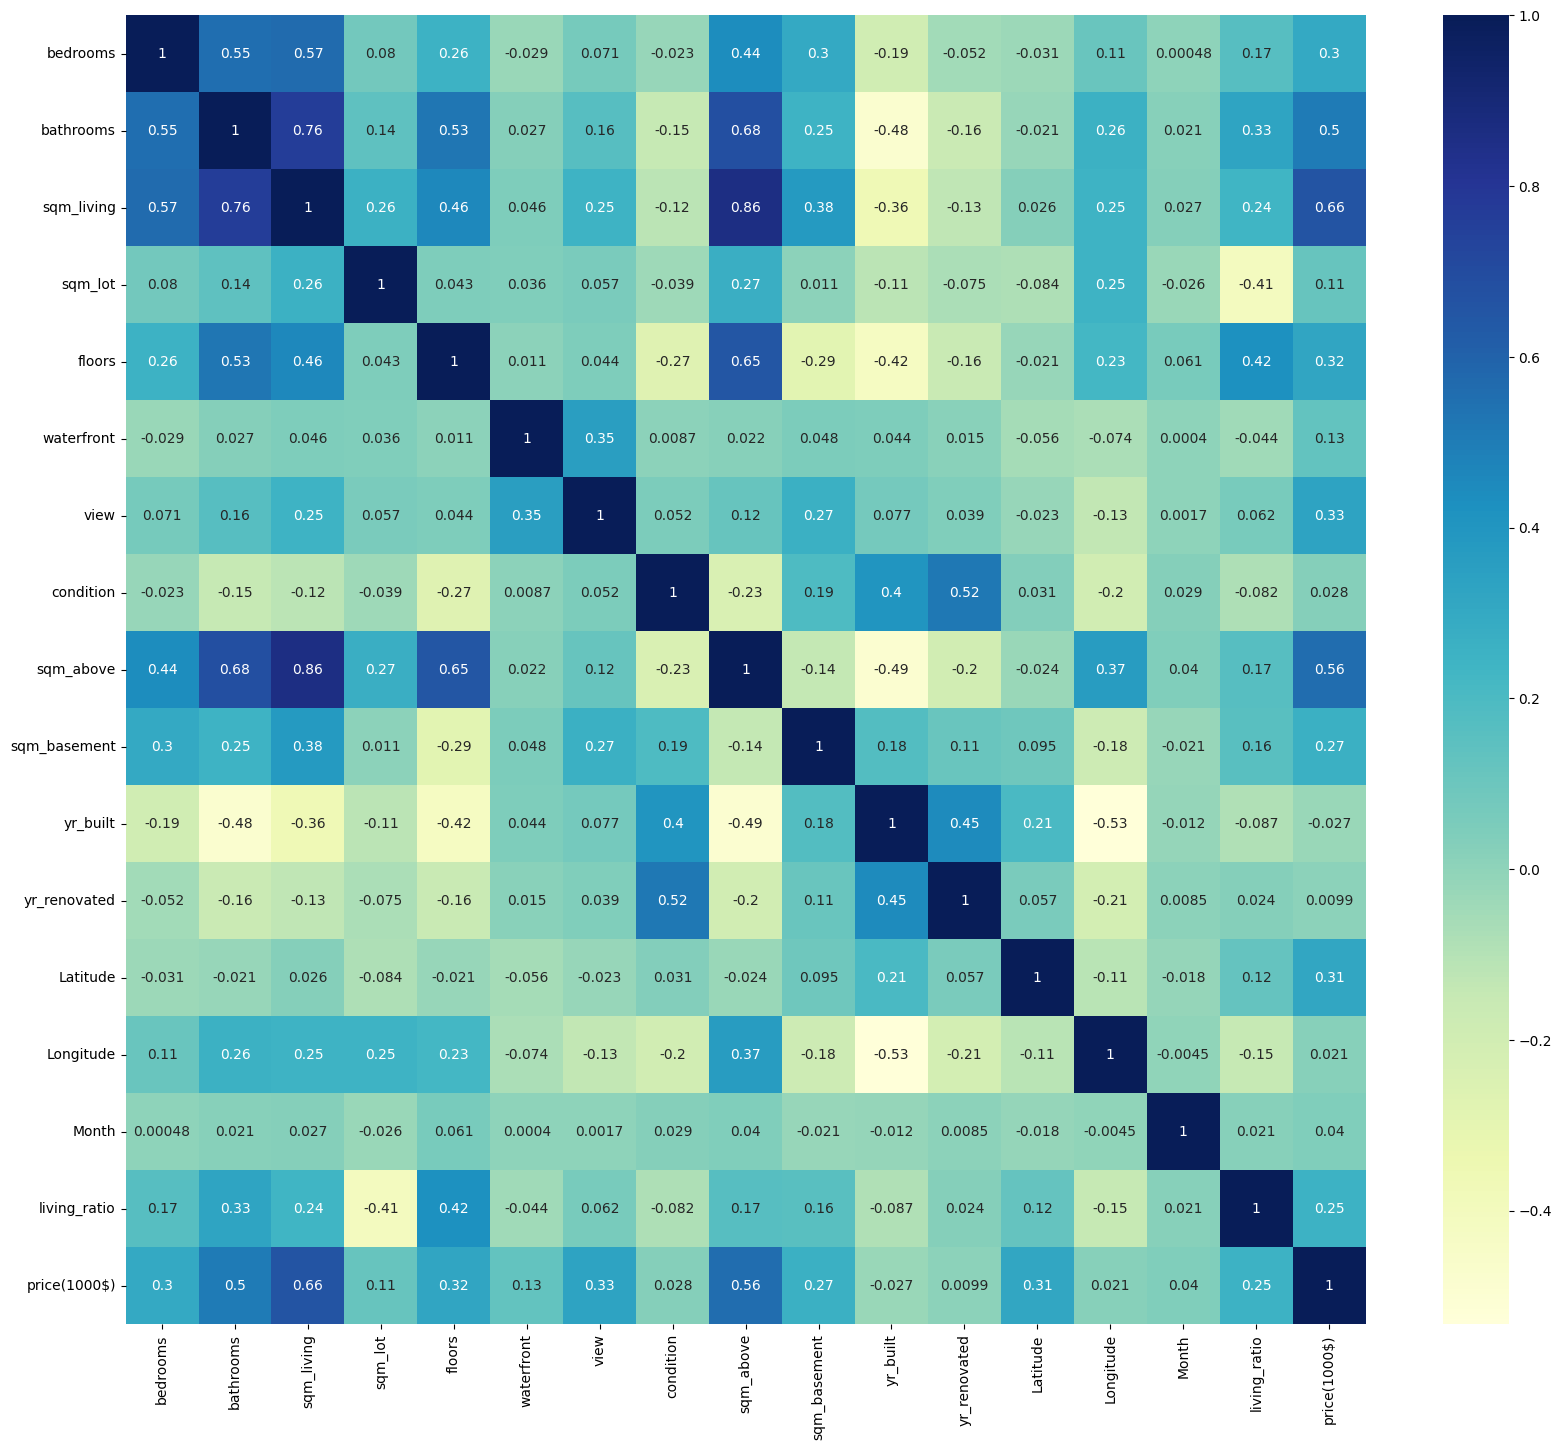

In [77]:
plt.figure(figsize=(20,17))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap="YlGnBu")

<Axes: xlabel='Latitude', ylabel='Longitude'>

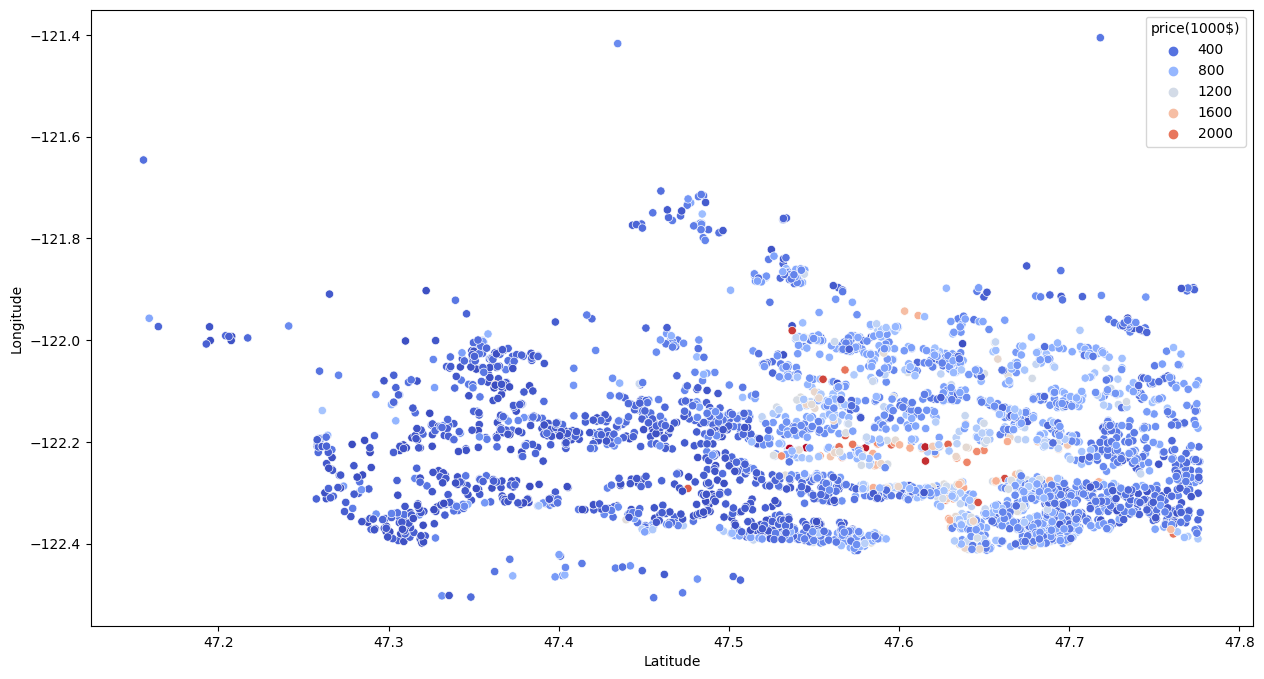

In [78]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Latitude', y='Longitude', data=train_data, hue='price(1000$)', palette='coolwarm')





## Modeling part
Begin trying to model using different algorithms
### Modeled separately using different standardized approaches
1. No standardization
2. StandardScaler
3. MinMaxScaler

In [79]:
# Standardized processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from prettytable import PrettyTable
from sklearn.model_selection import GridSearchCV

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

X_train_non = X_train.copy()
X_train_std = std_scaler.fit_transform(X_train)
X_train_mm = mm_scaler.fit_transform(X_train)

X_test_non = X_test.copy()
X_test_std = std_scaler.transform(X_test)
X_test_mm = mm_scaler.transform(X_test)

In [25]:
# Using linear regression algorithm
from sklearn.linear_model import LinearRegression

lr_non = LinearRegression()
lr_std = LinearRegression()
lr_mm = LinearRegression()


# Define the parameter grid
param_grid_lr = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
}
# Set up Grid Search CV
lr_non = GridSearchCV(estimator=lr_non, param_grid=param_grid_lr, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')

lr_std = GridSearchCV(estimator=lr_std, param_grid=param_grid_lr, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')

lr_mm = GridSearchCV(estimator=lr_mm, param_grid=param_grid_lr, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')


lr_non.fit(X_train_non, y_train)
lr_std.fit(X_train_std, y_train)
lr_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2',
             verbose=2)

In [26]:
# Linear regression algorithm model Evaluation
lr_pred_non = lr_non.predict(X_test_non)
lr_pred_std = lr_std.predict(X_test_std)
lr_pred_mm = lr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
lr_mse_non = mean_squared_error(y_test, lr_pred_non)
lr_mse_std = mean_squared_error(y_test, lr_pred_std)
lr_mse_mm =  mean_squared_error(y_test, lr_pred_mm)


# Compute MAE(Mean Absolute Error)
lr_mae_non = mean_absolute_error(y_test,lr_pred_non)
lr_mae_std = mean_absolute_error(y_test, lr_pred_std)
lr_mae_mm = mean_absolute_error(y_test, lr_pred_mm)


# Compute R(R-squared score)
lr_r2_non = r2_score(y_test, lr_pred_non)
lr_r2_std = r2_score(y_test, lr_pred_std)
lr_r2_mm = r2_score(y_test, lr_pred_mm)



table_lr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_lr.add_row(['LR(no)', lr_mse_non, lr_mae_non, lr_r2_non])
table_lr.add_row(['LR(std)', lr_mse_std, lr_mae_std, lr_r2_std])
table_lr.add_row(['LR(mm)', lr_mse_mm, lr_mae_mm, lr_r2_mm])

print(table_lr)

+-----------+-------------------+--------------------+--------------------+
| Algorithm |        MSE        |        MAE         |         R2         |
+-----------+-------------------+--------------------+--------------------+
|   LR(no)  | 37093.14736617007 | 129.74908818123242 | 0.5787016725441022 |
|  LR(std)  | 37078.79176306359 | 129.76131517945876 | 0.5788647213012938 |
|   LR(mm)  | 37106.96893087543 | 129.7154966329349  | 0.5785446893138655 |
+-----------+-------------------+--------------------+--------------------+


In [27]:
# Using RandomForest algorithm
from sklearn.ensemble import RandomForestRegressor

rf_non = RandomForestRegressor()
rf_std = RandomForestRegressor()
rf_mm = RandomForestRegressor()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],  # The number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node
}

# Set up Grid Search CV
rf_non = GridSearchCV(estimator=rf_non, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')
rf_std = GridSearchCV(estimator=rf_std, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')
rf_mm = GridSearchCV(estimator=rf_mm, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')

rf_non.fit(X_train_non, y_train)
rf_std.fit(X_train_std, y_train)
rf_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='r2', verbose=2)

In [28]:
# Random forest algorithm model Evaluation
rf_pred_non = rf_non.predict(X_test_non)
rf_pred_std = rf_std.predict(X_test_std)
rf_pred_mm = rf_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
rf_mse_non = mean_squared_error(y_test, rf_pred_non)
rf_mse_std = mean_squared_error(y_test, rf_pred_std)
rf_mse_mm =  mean_squared_error(y_test, rf_pred_mm)


# Compute MAE(Mean Absolute Error)
rf_mae_non = mean_absolute_error(y_test,rf_pred_non)
rf_mae_std = mean_absolute_error(y_test, rf_pred_std)
rf_mae_mm = mean_absolute_error(y_test, rf_pred_mm)


# Compute R(R-squared score)
rf_r2_non = r2_score(y_test, rf_pred_non)
rf_r2_std = r2_score(y_test, rf_pred_std)
rf_r2_mm = r2_score(y_test, rf_pred_mm)



table_rf = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_rf.add_row(['RF(no)', rf_mse_non, rf_mae_non, rf_r2_non])
table_rf.add_row(['RF(std)', rf_mse_std, rf_mae_std, rf_r2_std])
table_rf.add_row(['RF(mm)', rf_mse_mm, rf_mae_mm, rf_r2_mm])

print(table_rf)

+-----------+--------------------+-------------------+--------------------+
| Algorithm |        MSE         |        MAE        |         R2         |
+-----------+--------------------+-------------------+--------------------+
|   RF(no)  | 20381.981852947665 | 85.11178947111095 | 0.7685045493681999 |
|  RF(std)  | 20525.14031760265  | 86.21272597938123 | 0.7668785772951127 |
|   RF(mm)  | 21473.58273651821  | 86.31041421584246 | 0.7561063125198196 |
+-----------+--------------------+-------------------+--------------------+


In [29]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_non = DecisionTreeRegressor()
dt_std = DecisionTreeRegressor()
dt_mm = DecisionTreeRegressor()

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node
}

# Set up Grid Search CV
dt_non = GridSearchCV(estimator=dt_non, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')
dt_std = GridSearchCV(estimator=dt_std, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')
dt_mm = GridSearchCV(estimator=dt_mm, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=2, scoring='r2')
dt_non.fit(X_train_non, y_train)
dt_std.fit(X_train_std, y_train)
dt_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [30]:
# Decision Tree Regressor model Evaluation
dt_pred_non = dt_non.predict(X_test_non)
dt_pred_std = dt_std.predict(X_test_std)
dt_pred_mm = dt_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
dt_mse_non = mean_squared_error(y_test, dt_pred_non)
dt_mse_std = mean_squared_error(y_test, dt_pred_std)
dt_mse_mm =  mean_squared_error(y_test, dt_pred_mm)


# Compute MAE(Mean Absolute Error)
dt_mae_non = mean_absolute_error(y_test,dt_pred_non)
dt_mae_std = mean_absolute_error(y_test, dt_pred_std)
dt_mae_mm = mean_absolute_error(y_test, dt_pred_mm)


# Compute R(R-squared score)
dt_r2_non = r2_score(y_test, dt_pred_non)
dt_r2_std = r2_score(y_test, dt_pred_std)
dt_r2_mm = r2_score(y_test, dt_pred_mm)



table_dt = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_dt.add_row(['dt(no)', dt_mse_non, dt_mae_non, dt_r2_non])
table_dt.add_row(['dt(std)', dt_mse_std, dt_mae_std, dt_r2_std])
table_dt.add_row(['dt(mm)', dt_mse_mm, dt_mae_mm, dt_r2_mm])

print(table_dt)

+-----------+--------------------+--------------------+--------------------+
| Algorithm |        MSE         |        MAE         |         R2         |
+-----------+--------------------+--------------------+--------------------+
|   dt(no)  | 29897.11830294851  | 102.77935460056973 | 0.6604330764266491 |
|  dt(std)  | 29897.11830294851  | 102.77935460056973 | 0.6604330764266491 |
|   dt(mm)  | 29906.210174100564 | 102.83915608140597 | 0.6603298123366006 |
+-----------+--------------------+--------------------+--------------------+


In [31]:
# Support Vector Regressor
from sklearn.svm import SVR

svr_non = SVR()
svr_std = SVR()
svr_mm = SVR()

# Define the parameter grid
param_grid_svr = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Set up Grid Search CV
svr_non = GridSearchCV(estimator=svr_non, param_grid=param_grid_svr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')
svr_std = GridSearchCV(estimator=svr_std, param_grid=param_grid_svr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')
svr_mm = GridSearchCV(estimator=svr_mm, param_grid=param_grid_svr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')

svr_non.fit(X_train_non, y_train)
svr_std.fit(X_train_std, y_train)
svr_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='r2', verbose=2)

In [32]:
# Support Vector Regressor model Evaluation
svr_pred_non = svr_non.predict(X_test_non)
svr_pred_std = svr_std.predict(X_test_std)
svr_pred_mm = svr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
svr_mse_non = mean_squared_error(y_test, svr_pred_non)
svr_mse_std = mean_squared_error(y_test, svr_pred_std)
svr_mse_mm =  mean_squared_error(y_test, svr_pred_mm)


# Compute MAE(Mean Absolute Error)
svr_mae_non = mean_absolute_error(y_test,svr_pred_non)
svr_mae_std = mean_absolute_error(y_test, svr_pred_std)
svr_mae_mm = mean_absolute_error(y_test, svr_pred_mm)


# Compute R(R-squared score)
svr_r2_non = r2_score(y_test, svr_pred_non)
svr_r2_std = r2_score(y_test, svr_pred_std)
svr_r2_mm = r2_score(y_test, svr_pred_mm)



table_svr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_svr.add_row(['svr(no)', svr_mse_non, svr_mae_non, svr_r2_non])
table_svr.add_row(['svr(std)', svr_mse_std, svr_mae_std, svr_r2_std])
table_svr.add_row(['svr(mm)', svr_mse_mm, svr_mae_mm, svr_r2_mm])

print(table_svr)

+-----------+--------------------+--------------------+--------------------+
| Algorithm |        MSE         |        MAE         |         R2         |
+-----------+--------------------+--------------------+--------------------+
|  svr(no)  | 38304.760170161026 | 126.83295276431338 | 0.5649403585524219 |
|  svr(std) | 34794.11828860999  | 109.06595606295194 | 0.6048136952200724 |
|  svr(mm)  | 33909.76192147974  | 112.03762767492825 | 0.6148580803640182 |
+-----------+--------------------+--------------------+--------------------+


In [33]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_non = GradientBoostingRegressor()
gbr_std = GradientBoostingRegressor()
gbr_mm = GradientBoostingRegressor()

param_grid_gbr = {
    'n_estimators': [100, 200, 300],  # The number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # The maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node
}

# Set up Grid Search CV
gbr_non = GridSearchCV(estimator=gbr_non, param_grid=param_grid_gbr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')
gbr_std = GridSearchCV(estimator=gbr_std, param_grid=param_grid_gbr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')
gbr_mm = GridSearchCV(estimator=gbr_mm, param_grid=param_grid_gbr, 
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')

gbr_non.fit(X_train_non, y_train)
gbr_std.fit(X_train_std, y_train)
gbr_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [34]:
# Gradient Boosting Regressor model Evaluation
gbr_pred_non = gbr_non.predict(X_test_non)
gbr_pred_std = gbr_std.predict(X_test_std)
gbr_pred_mm = gbr_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
gbr_mse_non = mean_squared_error(y_test, gbr_pred_non)
gbr_mse_std = mean_squared_error(y_test, gbr_pred_std)
gbr_mse_mm =  mean_squared_error(y_test, gbr_pred_mm)


# Compute MAE(Mean Absolute Error)
gbr_mae_non = mean_absolute_error(y_test,gbr_pred_non)
gbr_mae_std = mean_absolute_error(y_test, gbr_pred_std)
gbr_mae_mm = mean_absolute_error(y_test, gbr_pred_mm)


# Compute R(R-squared score)
gbr_r2_non = r2_score(y_test, gbr_pred_non)
gbr_r2_std = r2_score(y_test, gbr_pred_std)
gbr_r2_mm = r2_score(y_test, gbr_pred_mm)



table_gbr = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_gbr.add_row(['gbr(no)', gbr_mse_non, gbr_mae_non, gbr_r2_non])
table_gbr.add_row(['gbr(std)', gbr_mse_std, gbr_mae_std, gbr_r2_std])
table_gbr.add_row(['gbr(mm)', gbr_mse_mm, gbr_mae_mm, gbr_r2_mm])

print(table_gbr)

+-----------+--------------------+-------------------+--------------------+
| Algorithm |        MSE         |        MAE        |         R2         |
+-----------+--------------------+-------------------+--------------------+
|  gbr(no)  | 21643.903848233742 | 84.92059234980609 | 0.7541718312317306 |
|  gbr(std) | 21229.127936837624 | 84.40168457461252 | 0.7588827929631567 |
|  gbr(mm)  | 21919.539439748132 | 84.67576691185539 |  0.75104120409605  |
+-----------+--------------------+-------------------+--------------------+


In [80]:
# XGboost(eXtreme Gradient Boosting) algorithm
import xgboost as xgb

xgb_non = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_std = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_mm = xgb.XGBRegressor(objective ='reg:squarederror')

# Define the parameter grid
param_grid_xgbr = {
    'n_estimators': [100, 200, 300],  # The number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5]  # Minimum sum of instance weight (hessian) needed in a child
}

# Set up Grid Search CV
xgb_non = GridSearchCV(estimator=xgb_non, param_grid=param_grid_xgbr, 
                                cv=5, n_jobs=-1, verbose=2, scoring='r2')
xgb_std = GridSearchCV(estimator=xgb_std, param_grid=param_grid_xgbr, 
                                cv=5, n_jobs=-1, verbose=2, scoring='r2')
xgb_mm = GridSearchCV(estimator=xgb_mm, param_grid=param_grid_xgbr, 
                                cv=5, n_jobs=-1, verbose=2, scoring='r2')

xgb_non.fit(X_train_non, y_train)
xgb_std.fit(X_train_std, y_train)
xgb_mm.fit(X_train_mm, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [81]:
# XGboost model Evaluation
xgb_pred_non = xgb_non.predict(X_test_non)
xgb_pred_std = xgb_std.predict(X_test_std)
xgb_pred_mm = xgb_mm.predict(X_test_mm)

# Compute MSE(Mean Squared Error)
xgb_mse_non = mean_squared_error(y_test, xgb_pred_non)
xgb_mse_std = mean_squared_error(y_test, xgb_pred_std)
xgb_mse_mm =  mean_squared_error(y_test, xgb_pred_mm)


# Compute MAE(Mean Absolute Error)
xgb_mae_non = mean_absolute_error(y_test,xgb_pred_non)
xgb_mae_std = mean_absolute_error(y_test, xgb_pred_std)
xgb_mae_mm = mean_absolute_error(y_test, xgb_pred_mm)


# Compute R(R-squared score)
xgb_r2_non = r2_score(y_test, xgb_pred_non)
xgb_r2_std = r2_score(y_test, xgb_pred_std)
xgb_r2_mm = r2_score(y_test, xgb_pred_mm)



table_xgb = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_xgb.add_row(['xgb(no)', xgb_mse_non, xgb_mae_non, xgb_r2_non])
table_xgb.add_row(['xgb(std)', xgb_mse_std, xgb_mae_std, xgb_r2_std])
table_xgb.add_row(['xgb(mm)', xgb_mse_mm, xgb_mae_mm, xgb_r2_mm])

print(table_xgb)

+-----------+--------------------+-------------------+--------------------+
| Algorithm |        MSE         |        MAE        |         R2         |
+-----------+--------------------+-------------------+--------------------+
|  xgb(no)  | 20854.965452711906 | 84.89857769418113 | 0.8017356067166651 |
|  xgb(std) | 19815.52031480454  | 83.44501299259835 | 0.8116174240750207 |
|  xgb(mm)  | 19804.378753397836 | 83.37268257356968 | 0.811723344888821  |
+-----------+--------------------+-------------------+--------------------+


In [82]:
#Summary

table_sum = PrettyTable(['Algorithm','MSE','MAE','R2'])
table_sum.add_row(['LR(no)', lr_mse_non, lr_mae_non, lr_r2_non])
table_sum.add_row(['LR(std)', lr_mse_std, lr_mae_std, lr_r2_std])
table_sum.add_row(['LR(mm)', lr_mse_mm, lr_mae_mm, lr_r2_mm])

table_sum.add_row(['RF(no)', rf_mse_non, rf_mae_non, rf_r2_non])
table_sum.add_row(['RF(std)', rf_mse_std, rf_mae_std, rf_r2_std])
table_sum.add_row(['RF(mm)', rf_mse_mm, rf_mae_mm, rf_r2_mm])

table_sum.add_row(['dt(no)', dt_mse_non, dt_mae_non, dt_r2_non])
table_sum.add_row(['dt(std)', dt_mse_std, dt_mae_std, dt_r2_std])
table_sum.add_row(['dt(mm)', dt_mse_mm, dt_mae_mm, dt_r2_mm])

table_sum.add_row(['svr(no)', svr_mse_non, svr_mae_non, svr_r2_non])
table_sum.add_row(['svr(std)', svr_mse_std, svr_mae_std, svr_r2_std])
table_sum.add_row(['svr(mm)', svr_mse_mm, svr_mae_mm, svr_r2_mm])

table_sum.add_row(['gbr(no)', gbr_mse_non, gbr_mae_non, gbr_r2_non])
table_sum.add_row(['gbr(std)', gbr_mse_std, gbr_mae_std, gbr_r2_std])
table_sum.add_row(['gbr(mm)', gbr_mse_mm, gbr_mae_mm, gbr_r2_mm])

table_sum.add_row(['xgb(no)', xgb_mse_non, xgb_mae_non, xgb_r2_non])
table_sum.add_row(['xgb(std)', xgb_mse_std, xgb_mae_std, xgb_r2_std])
table_sum.add_row(['xgb(mm)', xgb_mse_mm, xgb_mae_mm, xgb_r2_mm])

print(table_sum)

+-----------+--------------------+--------------------+--------------------+
| Algorithm |        MSE         |        MAE         |         R2         |
+-----------+--------------------+--------------------+--------------------+
|   LR(no)  | 37093.14736617007  | 129.74908818123242 | 0.5787016725441022 |
|  LR(std)  | 37078.79176306359  | 129.76131517945876 | 0.5788647213012938 |
|   LR(mm)  | 37106.96893087543  | 129.7154966329349  | 0.5785446893138655 |
|   RF(no)  | 20381.981852947665 | 85.11178947111095  | 0.7685045493681999 |
|  RF(std)  | 20525.14031760265  | 86.21272597938123  | 0.7668785772951127 |
|   RF(mm)  | 21473.58273651821  | 86.31041421584246  | 0.7561063125198196 |
|   dt(no)  | 29897.11830294851  | 102.77935460056973 | 0.6604330764266491 |
|  dt(std)  | 29897.11830294851  | 102.77935460056973 | 0.6604330764266491 |
|   dt(mm)  | 29906.210174100564 | 102.83915608140597 | 0.6603298123366006 |
|  svr(no)  | 38304.760170161026 | 126.83295276431338 | 0.5649403585524219 |

In [63]:
#Save
import joblib

#Save scaler
joblib.dump(std_scaler, '../scaler/scaler_std.pickle')

#Save model
joblib.dump(xgb_std, '../model/xgb_std.pickle')
joblib.dump(rf_std, '../model/RF_std.pickle')
joblib.dump(gbr_std, '../model/gbr_std.pickle')



['../model/gbr_std.pickle']